This notebook reproduces 

> **Fig 11**: Stark states of $n=30$ and 31 states of Ps, with $m=2$ (grey dashed) and $m=29$ (black). In the $n=30$ level, the $m=29$ state is a circular state and experiences no first-order Stark shift and only a very weak second-order shift, as explained in the text.

from the article

> #### Prospects for Studies of the Free Fall and Gravitational Quantum States of Antimatter
>
> G. Dufour, D. B. Cassidy, P. Crivelli, P. Debu, A. Lambrecht, V. V. Nesvizhevsky, S. Reynaud, A. Yu. Voronin, and T. E. Wall.
>
> *Adv. High En. Phys.*, **2015**, 379642 (2015) [DOI:10.1155/2015/379642](https://dx.doi.org/10.1155/2015/379642)

This article uses an $|\, n \, l \, m_l \, \rangle$ basis and plots the Stark structure for $m_l=2$ and $m_l=29$.

The calculation below uses an $|\, n \, l \, S \, J \, M_J \, \rangle$ basis with $S=0$ and plots Stark structure for $M_J = 2$ and $M_J=29$.

In [1]:
# packages
import os
from functools import reduce
from hsfs import Hamiltonian, En_h, h, c, constants_info, rad_overlap, mu_me
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['axes.formatter.useoffset'] = False

# Crossed fields, $n=20-21$

In [4]:
# construct matrix
n_min = 20
n_max = 21
S = None
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ_max=None)
print('Number of basis states:', '%d'%mat0.num_states)

Number of basis states: 3364


In [5]:
# calculate Stark map
Bfield=0.1
Efield_vec=[1.0,0.0,0.0]
Efield = np.linspace(4.5*10**2, 6.0*10**2, 31) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     singlet_triplet_coupling=False,
                     cache_matrices=True,
                     load_matrices=False,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')
sm1 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     singlet_triplet_coupling=True,
                     cache_matrices=True,
                     load_matrices=False,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')

Field orientation: perpendicular
Loaded zeeman matrix from, 
	 ./saved_matrices/zeeman_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None.npz
Loaded stark matrix from, 
	 ./saved_matrices/stark_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None_perpendicular.npz


diagonalise Hamiltonian: 100%|██████████| 31/31 [02:14<00:00,  4.01s/it]


Field orientation: perpendicular
Using cached Zeeman matrix
Loaded singlet-triplet matrix from, 
	 ./saved_matrices/singlet-triplet_n=20-21_l_max=None_S=None_MJ=None_MJ_max=None.npz


diagonalise Hamiltonian:   0%|          | 0/31 [00:00<?, ?it/s]

Using cached Stark matrix


diagonalise Hamiltonian: 100%|██████████| 31/31 [02:07<00:00,  4.36s/it]


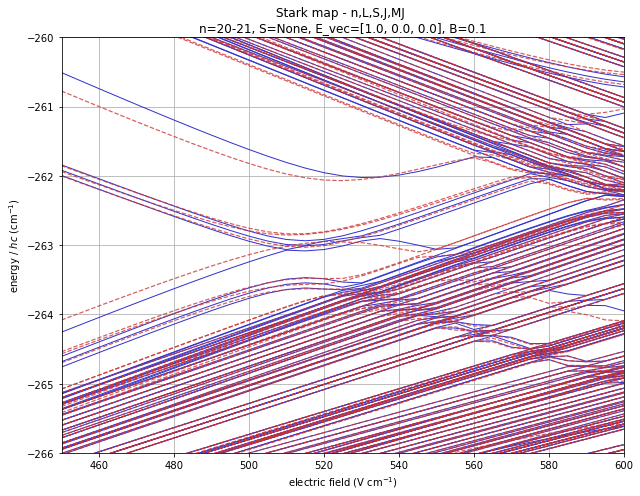

In [7]:
fig, ax = plt.subplots(figsize=(9, 7))

indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))

indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(450, 600)
ax.set_ylim(-266, -260)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ \n' + \
          'n='+str(n_min)+'-'+str(n_max)+ ', ' + \
          'S=' + str(S) + ', ' + \
          'E_vec='+str(Efield_vec) + ', ' + \
          'B='+str(Bfield))
plt.tight_layout()
plt.savefig('singlet-triplet-sm.pdf')

# Crossed fields, $n=5-6$

In [11]:
# construct matrix
n_min = 5
n_max = 6
S = None
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ_max=None)
print('Number of basis states:', '%d'%mat0.num_states)

Number of basis states: 244


In [12]:
# calculate Stark map
Bfield=10.0
Efield_vec=[1.0,0.0,0.0]
Efield = np.linspace(3.0*10**5, 6.0*10**5, 501) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     singlet_triplet_coupling=False,
                     cache_matrices=True,
                     load_matrices=False,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')
sm1 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     singlet_triplet_coupling=True,
                     cache_matrices=True,
                     load_matrices=False,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')

calculate Zeeman terms:   6%|▌         | 15/244 [00:00<00:01, 147.77it/s]

Field orientation: perpendicular


calculate Stark terms:   2%|▏         | 5/244 [00:00<00:06, 38.30it/s]

Saved zeeman matrix as, 
	 ./saved_matrices/zeeman_n=5-6_l_max=None_S=None_MJ=None_MJ_max=None


calculate Stark terms: 100%|██████████| 244/244 [00:06<00:00, 38.35it/s]
diagonalise Hamiltonian: 0it [00:00, ?it/s]
calculate singlet-triplet coupling terms: 100%|██████████| 244/244 [00:00<00:00, 1377.27it/s]
diagonalise Hamiltonian: 0it [00:00, ?it/s]

Saved stark matrix as, 
	 ./saved_matrices/stark_n=5-6_l_max=None_S=None_MJ=None_MJ_max=None_perpendicular
Field orientation: perpendicular
Using cached Zeeman matrix
Saved singlet-triplet matrix as, 
	 ./saved_matrices/singlet-triplet_n=5-6_l_max=None_S=None_MJ=None_MJ_max=None
Using cached Stark matrix


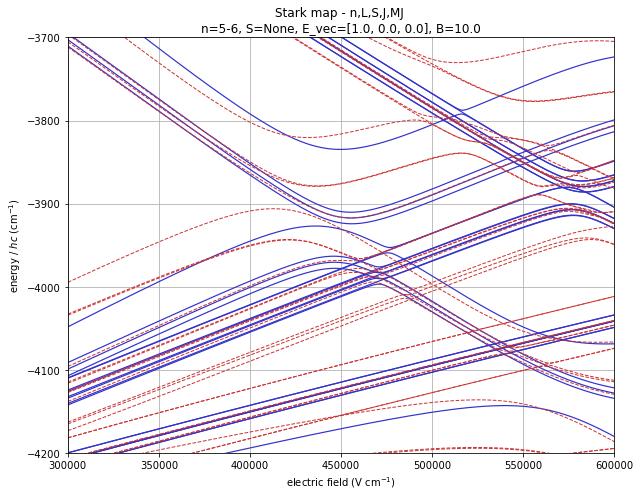

In [10]:
fig, ax = plt.subplots(figsize=(9, 7))

# plot
#MJ = 0
indexes = range(mat0.num_states)
#indexes = mat0.where('J', 11)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.2, alpha=1, c=(0.2, 0.2, 0.8))
#MJ = 1
indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1., alpha=1, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(3.0*10**5, 6.0*10**5)
ax.set_ylim(-4200, -3700)
plt.title('Stark map - n,L,S,J,MJ \n' + \
          'n='+str(n_min)+'-'+str(n_max)+ ', ' + \
          'S=' + str(S) + ', ' + \
          'E_vec='+str(Efield_vec) + ', ' + \
          'B='+str(Bfield))

# output
plt.grid()
plt.tight_layout()

In [7]:
constants_info()

,Constant,Value
0,"speed of light in vacuum, $c$",299792458
1,"Planks constant, $h$",6.62607004e-34
2,"Reduced Planks constant, $\hbar$",1.0545718e-34
3,"Rydberg constant, $R_{\infty}$",10973731.568508
4,"electron charge, $e$",1.6021766208e-19
5,fine structure constant,0.0072973525664
6,atomic mass,1.66053904e-27
7,Hatree energy,4.3597446510117e-18
8,"Bohr radius, $a_0$",5.2917721048e-11
9,"Bohr magneton, $\mu_B$",9.2740099908307e-24
